<a href="https://colab.research.google.com/github/gaubeur/machine-learning/blob/master/aula_pratica_modelo_preditivo_preparando_dataset_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [ ]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import datetime #biblioteca para trabalhar com formatos de data e hora


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
#realizando a leitura do arquivo (dataset)
#infelizmente o header=None não fucionou no processo ,e não sei porque
dataframe_diabetes = pd.read_csv('pima-indians-diabetes.csv', header=None)

In [ ]:
#apresentando as 5 primeiras linhas do dataset
dataframe_diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe_diabetes.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#resumo da descrição estatistica do dataframe
print(dataframe_diabetes.describe());

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [ ]:
#verificando onde existe valores estranhos igual a zero
dataframe_diabetes.drop(columns=[0,8], axis=1)[dataframe_diabetes.eq(0).any(1)]

,1,2,3,4,5,6,7
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [ ]:
#contando a quantidade de colunas com zero
print((dataframe_diabetes[[1,2,3,4,5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [ ]:
#substituindo os valores zeros por Nan
dataframe_diabetes[[1,2,3,4,5]] = dataframe_diabetes[[1,2,3,4,5]].replace(0,np.NaN)


In [ ]:
dataframe_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       763 non-null    float64
 2   2       733 non-null    float64
 3   3       541 non-null    float64
 4   4       394 non-null    float64
 5   5       757 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
#contando a quantidade de valores nulos em cada uma das colunas
dataframe_diabetes.isnull().sum()

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

In [ ]:
#removendo as colunas que tem valores nulos
dataframe_remove_nan = dataframe_diabetes.dropna()
dataframe_remove_nan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       392 non-null    int64  
 1   1       392 non-null    float64
 2   2       392 non-null    float64
 3   3       392 non-null    float64
 4   4       392 non-null    float64
 5   5       392 non-null    float64
 6   6       392 non-null    float64
 7   7       392 non-null    int64  
 8   8       392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [ ]:
dataframe_remove_nan.head()

,0,1,2,3,4,5,6,7,8
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [ ]:
dataframe_diabetes.head()


,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


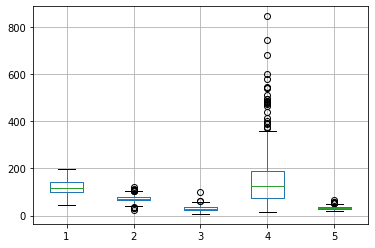

In [ ]:
#identificando outliers
dataframe_diabetes.boxplot([1,2,3,4,5])

In [ ]:
#preenchendo os valores com media
dataframe_nan_media = dataframe_diabetes.fillna(dataframe_diabetes.mean())
dataframe_nan_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
dataframe_nan_media.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
